# XgboostClassifier_RandomizedSearchCV

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*In this notebook, the use of the 'xgboost' algorithm for classification is demonstrated. The scope of this case study is to predict whether an asteroid can be hazardous or not based on its characteristics/properties(NASA Asteroid dataset). In the first part of this project a feature selection takes place so as to identify the dataset features that are to be used as inputs to the model and to drop all the uneccesary columns. In addition a mini exploratory analysis is provided that includes a) a heatmap of the correlations between the dataset features, b) a plot of the correlation between the output (dependent) parameter and each input (independent) feature and c) a countplot to observe whether the classes of the output feature are balanced or not.*

*In the second part of this project there is use of the 'RandomizedSearchCV' and 'XGBClassifier' function. 'RandomizedSearchCV' function takes as input a set of values for each of the selected 'xgboost' model hyperparameters and does a randomized search (fit & score approach) so as to determine an optimal value for each of them. In contrast to 'GridSearchCV', randomized search combines the hyperparameters values randomly (whereas in 'GridSearchCV' all possible combinations are tested) based on the parameters distribution. Tuning the values of hyperparameters (learning rate,max depth,min_child_weight,gamma,etc.) is important as it can improve the model training performance and avoid/minimize overfitting (by making the model less sensitive to noise and by contolling the complexity of its structure). The optimal hyperparameter values determined by the random search  are then used by the 'xgboost' classifier for fitting (training set) and prediction (test set). 'Xgboost' is an ensemble supervised machine learning algorithm (based on decision trees) that tries to reduce the residuals (difference between target and predicted values) of the previous tree each time a new tree is added (similar to 'Gradient Boosting') and it is also capable of reducing the computational complexity and time of the training compared to other machine learning models (data storage in CPU cache).*




**The Dataset (.csv file format) for this project has been obtained from Kaggle:**

"*NASA: Asteroids Classification*" -- File: "nasa.csv" -- Source:https://www.kaggle.com/shrutimehta/nasa-asteroids-classification



## Part A

In [20]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Importing the dataset
data=pd.read_csv('nasa.csv')
# Dataset First 5 records
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [22]:
# Dataset columns
data.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [23]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [24]:
# In this classification example, the model has to learn to classify whether an asteroid is hazardous or not based on its
# characteristics/properties (without knowning its name or reference id). For this reason, the 'Neo Reference ID'  and 'Name'
# columns are to be dropped from the dataset.
data=data.drop(['Neo Reference ID','Name'],axis=1)

In [25]:
# Date features are also dropped from the dataset
data=data.drop(['Close Approach Date','Orbit Determination Date'],axis=1)

In [26]:
# This column has only one class ('Earth'), therefore it is not going to contribute during the training, thus it will be dropped
data['Orbiting Body'].value_counts()

Earth    4687
Name: Orbiting Body, dtype: int64

In [27]:
# This column has also only one class('J2000'),therefore it is also going to be dropped
data['Equinox'].value_counts()

J2000    4687
Name: Equinox, dtype: int64

In [28]:
# Dropping 'Orbiting Body' and 'Equinox' columns from the dataset
data=data.drop(['Orbiting Body','Equinox'],axis=1)

In [29]:
# Replacing the white space in column names with underscore
data.columns=data.columns.str.replace(' ','_')
data.head()

,Absolute_Magnitude,Est_Dia_in_KM(min),Est_Dia_in_KM(max),Est_Dia_in_M(min),Est_Dia_in_M(max),Est_Dia_in_Miles(min),Est_Dia_in_Miles(max),Est_Dia_in_Feet(min),Est_Dia_in_Feet(max),Epoch_Date_Close_Approach,...,Inclination,Asc_Node_Longitude,Orbital_Period,Perihelion_Distance,Perihelion_Arg,Aphelion_Dist,Perihelion_Time,Mean_Anomaly,Mean_Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


<AxesSubplot:>

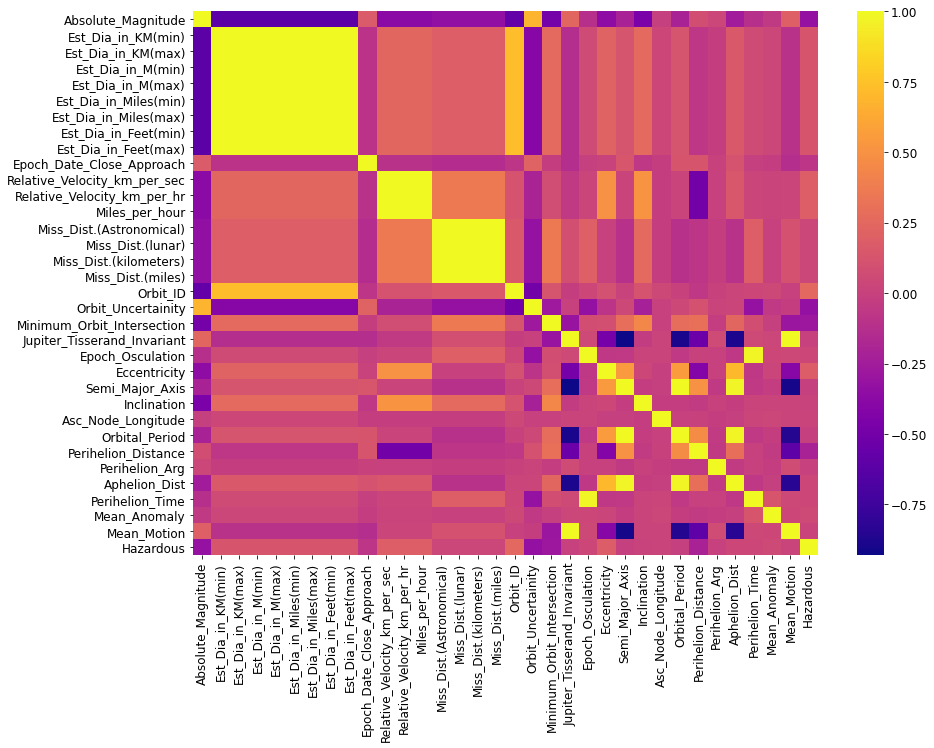

In [30]:
# Heatmap displaying the correlations between the dataset features. 
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),cmap='plasma')

Text(0.5, 1.0, "Correlations of the numerical variables to 'Hazardous' feature")

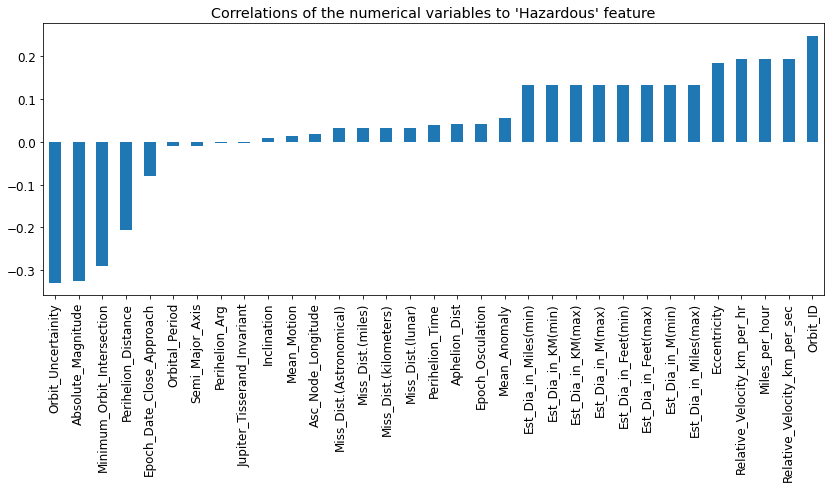

In [31]:
# Bar plot showing the correlations between the 'Hazardous' feature and the other numerical variables. 
# Correlation varies between -1 and 1, where a) values close to 1 indicate positive correlation, b) values close to -1
# indicate negative correlation between two variables.
plt.figure(figsize=(14,5))
plt.rcParams['font.size']=12
data.corr()['Hazardous'].sort_values().drop('Hazardous').plot(kind='bar')
plt.title("Correlations of the numerical variables to 'Hazardous' feature")

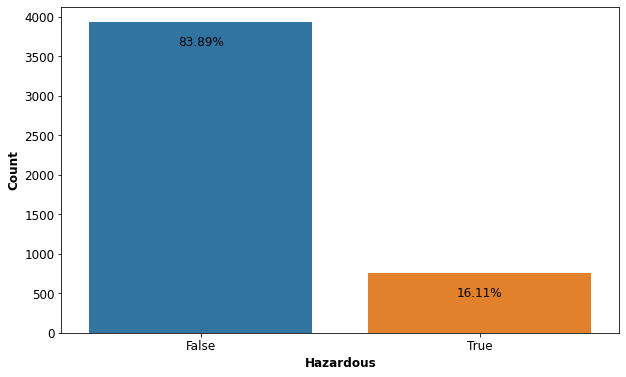

In [32]:
# Due to the boolean nature of the dependent(output) parameter (Hazardous:True/False), the countplot is 
# employed to observe whether or not the data samples are balanced with respect to the 'Hazardous' feature entries.
# As expected, the majority of the Asteroids are not Hazardous (83.89%). Therefore,the classification should not be based
# on accuracy as the model would be 83.89% accurate, but on other relevant metrics such as precision,recall and F1-Score
plt.figure(figsize=(10,6))
total = len(data['Hazardous'])
count_entries=sns.countplot(x='Hazardous',data=data)
plt.xlabel('Hazardous',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
for p in count_entries.patches:
    count_entries.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points')

## Part B

In [33]:
# XGBOOST model independent(input) & dependent(output) features
X=data.drop('Hazardous',axis=1).values
y=data['Hazardous'].values

In [34]:
# Data are to be used for training and for validation purposes, thus the necessary libraries and functions are imported
from sklearn.model_selection import train_test_split
# Data are split for training and testing,test_size =0.25 which means 25% of the dataset will be used for validation purposes
# to assess the model performance
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)


In [35]:
# As it can be observed, the percentage of 'Hazardous ==True' for the y_train samples is the same with the y_test samples,
# (i.e.for both train and test sets)
print(round(len(y_train[y_train==True])/len(y_train),2))
print(round(len(y_test[y_test==True])/len(y_test),2))

0.16
0.16


In [36]:
# Optimizing the hyperparameters by selecting different values for each hyperparameter. Then by applying Random Search, the 
# model will try to determine the optimal values for all parameters
opt_parameters={
 "learning_rate"    : [0.001,0.005,0.01,0.05,0.10, 0.15, 0.20,0.25,0.3,0.35],#Learning_Rate:the step size at every iteration
 "max_depth"        : [ 2,3,4,5,6,7,8,9,10,11,12,13,14],#max_depth: max tree depth (very high values can lead to overfitting)
 "min_child_weight" : [ 1,2,3,4,5,6],# min_child_weight:minimum samples number in each node
 "gamma"            : [ 0,0.05, 0.1,0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5],#gamma:higher gamma value --> higher regularization
'colsample_bylevel' : [ 0.3,0.4, 0.5,0.6,0.7],#colsample_bytree:columns subsample ratio for each level
'colsample_bynode'  : [ 0.3,0.4, 0.5,0.6,0.7],#colsample_bynode:columns subsample ratio for each split
'colsample_bytree'  : [ 0.3,0.4, 0.5,0.6,0.7]}#colsample_bytree:feature percentage for building each tree

In [37]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# Importing xgboost classifier fit the model to the training set
from xgboost import XGBClassifier
xgboost_clf=XGBClassifier()

In [42]:
# Use of RandomizedSearchCV function that takes as inputs the classifier, the parameters that are to be optimized, the
#  number of iterations, the score metric and the cross validation number
from sklearn.metrics import make_scorer,average_precision_score
scoring = make_scorer(average_precision_score)
rand_search=RandomizedSearchCV(xgboost_clf,param_distributions=opt_parameters,n_iter=7,scoring=scoring,
                                 cv=10,verbose=3)

In [43]:
# RandomizedSearchCV to fit the model to the training set
rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[06:43:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END colsample_bylevel=0.6, colsample_bynode=0.4, colsample_bytree=0.3, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=6;, score=0.983 total time=   0.0s
[06:43:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/10] END colsample_bylevel=0.6, colsample_bynode=0.4, colsample_bytree=0.3, gamma=0, learning_rate=0.2, max_depth=8, min_child_weight=6;, score=0.971 total time=   0.0s
[06:43:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default eval

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                   param_distributions={'colsample_bylevel': [0.3, 0.4, 0.5,
                                                              0.6, 0.7],
                               

In [44]:
# Best estimator returns optimal values for all the hyperparameters of the RandomizedSearchCV()
rand_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=0.4, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
# Best params returns optimal values for the previously defined opt_parameters(dict)  
rand_search.best_params_

{'min_child_weight': 6,
 'max_depth': 8,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.3,
 'colsample_bynode': 0.4,
 'colsample_bylevel': 0.6}

In [46]:
# Best score obtained from the RandomizedSearchCV()
rand_search.best_score_

0.9773811683124295

In [47]:
# RandomizedSearchCV cross validation results
rand_search.cv_results_

{'mean_fit_time': array([0.09025846, 0.0633328 , 0.09295146, 0.09534643, 0.08188128,
        0.09843616, 0.09335034]),
 'std_fit_time': array([0.00286463, 0.00245488, 0.00263153, 0.00228354, 0.0120134 ,
        0.00571222, 0.00264613]),
 'mean_score_time': array([0.00179539, 0.00189486, 0.00149603, 0.00179541, 0.00169518,
        0.00139651, 0.00149615]),
 'std_score_time': array([0.00039892, 0.00029895, 0.00049839, 0.00039917, 0.00045713,
        0.00048854, 0.0004986 ]),
 'param_min_child_weight': masked_array(data=[6, 3, 1, 2, 2, 2, 4],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[8, 2, 12, 4, 2, 12, 7],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.2, 0.3, 0.25, 0.1, 0.05, 0.15, 0.15],
              mask=[False, False, False, False, False, False, Fa

In [48]:
# Mean test score for each split
rand_search.cv_results_['mean_test_score']

array([0.97738117, 0.97371198, 0.97495814, 0.97473426, 0.97709575,
       0.97345733, 0.9749255 ])

In [49]:
# Mean test score of all splits
rand_search.cv_results_['mean_test_score'].mean()

0.9751805888669968

In [50]:
# Fitting the model to the training set by using the RandomizedSearchCV best params

xgboost_clf=XGBClassifier(objective='binary:logistic',missing=None,booster='gbtree',n_estimators=100,scale_pos_weight=1,
                          min_child_weight=1,max_depth=8,learning_rate=0.1,gamma=0.35,
                          colsample_bylevel=0.7,colsample_bynode=0.3,colsample_bytree=0.7,seed=0)
xgboost_clf.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.64730
[1]	validation_0-aucpr:0.98156
[2]	validation_0-aucpr:0.98191
[3]	validation_0-aucpr:0.98325
[4]	validation_0-aucpr:0.98529
[5]	validation_0-aucpr:0.98415
[6]	validation_0-aucpr:0.98606
[7]	validation_0-aucpr:0.98603
[8]	validation_0-aucpr:0.98861
[9]	validation_0-aucpr:0.99111
[10]	validation_0-aucpr:0.99199
[11]	validation_0-aucpr:0.99206
[12]	validation_0-aucpr:0.99105
[13]	validation_0-aucpr:0.99125
[14]	validation_0-aucpr:0.99047
[15]	validation_0-aucpr:0.98982
[16]	validation_0-aucpr:0.99048
[17]	validation_0-aucpr:0.99203
[18]	validation_0-aucpr:0.99187
[19]	validation_0-aucpr:0.99221
[20]	validation_0-aucpr:0.99298
[21]	validation_0-aucpr:0.99265
[22]	validation_0-aucpr:0.99291
[23]	validation_0-aucpr:0.99277
[24]	validation_0-aucpr:0.99354
[25]	validation_0-aucpr:0.99380
[26]	validation_0-aucpr:0.99426
[27]	validation_0-aucpr:0.99442
[28]	validation_0-aucpr:0.99448
[29]	validation_0-aucpr:0.99463
[30]	validation_0-aucpr:0.99481
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=0.3, colsample_bytree=0.7, gamma=0.35, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
# XGBClassifier Predictions on the test set
ypred=xgboost_clf.predict(X_test)

In [52]:
# Importing the metrics
from sklearn.metrics import classification_report,plot_confusion_matrix


In [53]:
# Classification report. As it can be observed, F1 scores are very high,meaning that the xgboost has provided very accurate
# classifications (i.e. whether an asteroid is hazardous or not)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       984
        True       1.00      0.97      0.98       188

    accuracy                           0.99      1172
   macro avg       1.00      0.98      0.99      1172
weighted avg       0.99      0.99      0.99      1172



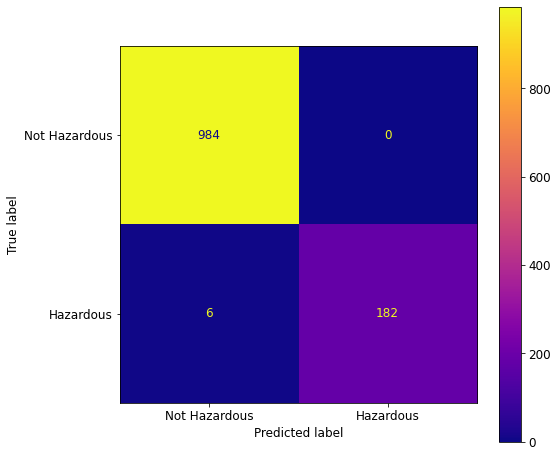

In [54]:
# Confusion Matrix
fig, axs = plt.subplots(figsize=(8,8))
plot_confusion_matrix(xgboost_clf,X_test,y_test,values_format='d',
                      display_labels=['Not Hazardous','Hazardous'],cmap='plasma',ax=axs);
